In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
    


In [4]:
train_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")
train = train_raw.drop(['Loan_ID'], axis = 1)
test = test_raw.drop(['Loan_ID'], axis = 1)


In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
for col in train:
    imr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
    imr = imr.fit(train[[f'{col}']])
    train[f'{col}'] = imr.transform(train[[f'{col}']])
    
for col in test:
    imr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
    imr = imr.fit(test[[f'{col}']])
    test[f'{col}'] = imr.transform(test[[f'{col}']])

C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\si

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

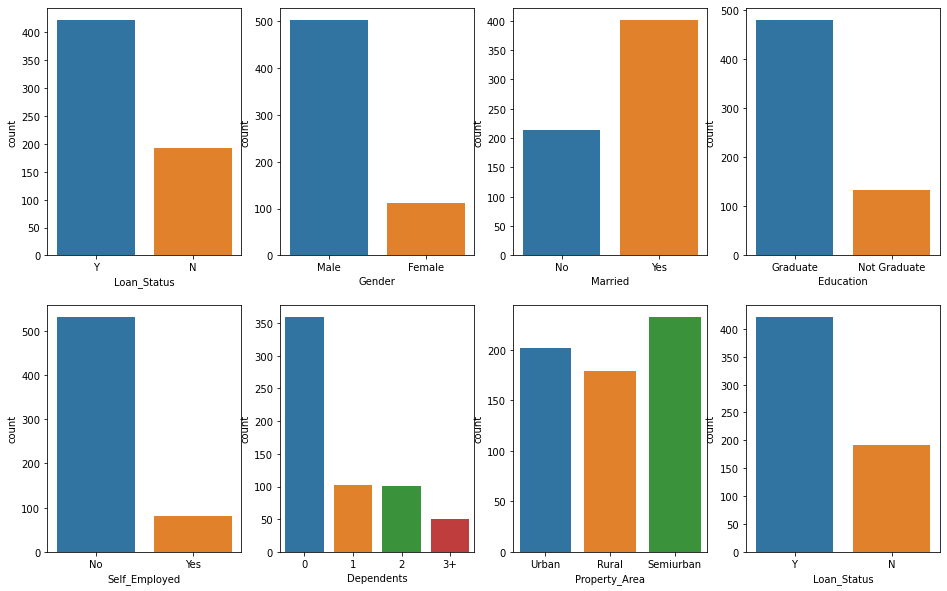

In [7]:
fig, ax  = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data = train, ax=ax[0][0] )
sns.countplot('Gender', data = train, ax=ax[0][1] )
sns.countplot('Married', data = train, ax=ax[0][2] )
sns.countplot('Education', data = train, ax=ax[0][3] )
sns.countplot('Self_Employed', data = train, ax=ax[1][0] )
sns.countplot('Dependents', data = train, ax=ax[1][1] )
sns.countplot('Property_Area', data = train, ax=ax[1][2] )
sns.countplot('Loan_Status', data = train, ax=ax[1][3] )

In [8]:
le = LabelEncoder()
for col in train[['Gender', 'Married', 'Education','Self_Employed', 'Dependents', 'Property_Area','Credit_History', 'Loan_Status']]:  
    #print(col)
    train[col] = le.fit_transform(train[col])
#
# Print df.head for checking the transformation
#

train['CoapplicantIncome'] = train['CoapplicantIncome'].astype('int')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0,141.0,360.0,1,2,1


In [9]:
le = LabelEncoder()
for col in test[['Gender', 'Married', 'Education','Self_Employed', 'Dependents','Credit_History', 'Property_Area']]:  
    #print(col)
    test[col] = le.fit_transform(test[col])
#
# Print df.head for checking the transformation
#
test['CoapplicantIncome'] = test['CoapplicantIncome'].astype('int')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,1,0,0,1,0,3276,0,78.0,360.0,1,2


C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dinus\anaconda3\lib\si

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

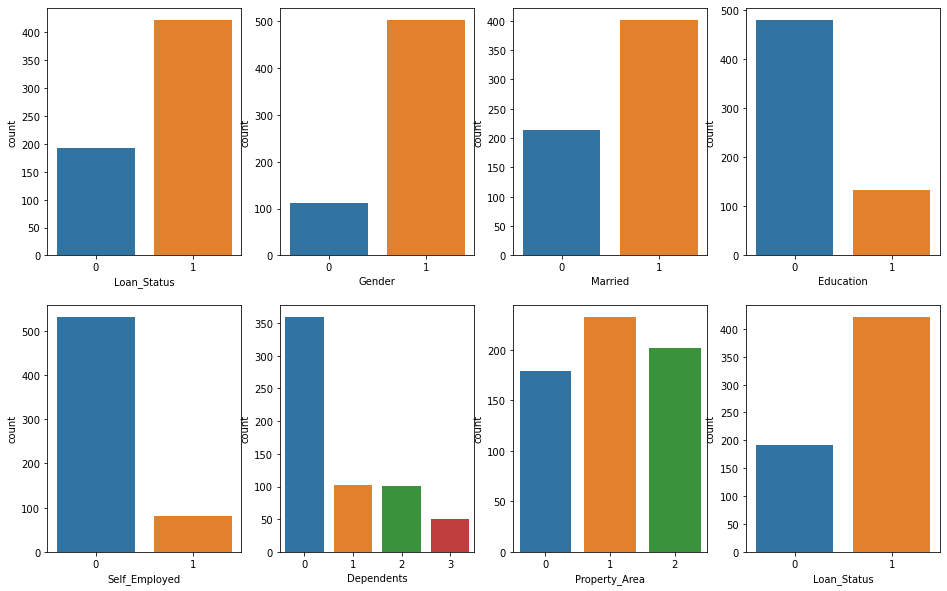

In [10]:
fig, ax  = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data = train, ax=ax[0][0] )
sns.countplot('Gender', data = train, ax=ax[0][1] )
sns.countplot('Married', data = train, ax=ax[0][2] )
sns.countplot('Education', data = train, ax=ax[0][3] )
sns.countplot('Self_Employed', data = train, ax=ax[1][0] )
sns.countplot('Dependents', data = train, ax=ax[1][1] )
sns.countplot('Property_Area', data = train, ax=ax[1][2] )
sns.countplot('Loan_Status', data = train, ax=ax[1][3] )

In [11]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int32
Loan_Status            int32
dtype: object

In [12]:
x = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, stratify=y) 

In [14]:
x_train.shape

(368, 11)

In [15]:
x_test.shape

(246, 11)

In [16]:
log_clf = LogisticRegression()

param_grid = [{'C': [0.01,0.1,1,10,100,1000],
              'penalty':['l2']}]
gs_r = GridSearchCV(log_clf,
                    param_grid,
                    scoring='f1',
                    cv=5,
                    verbose = 1,
                    n_jobs= -1)
gs_r.fit(x_train, y_train)
print(gs_r.best_score_)
print(gs_r.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8684260873219529
{'C': 100, 'penalty': 'l2'}


In [17]:
clf = gs_r.best_estimator_

In [18]:
gs_r.score(x_test, y_test)

0.8812664907651715

In [19]:
model = clf.fit(x, y)
pred = model.predict(test)

C:\Users\dinus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
test['Loan_Status'] = pred

In [21]:
New_loan_status = []
for i in range(len(test)):
    if test.iloc[i]['Loan_Status'] == 0:
        #print('hei')
        income = 5*12*(test.iloc[i]['ApplicantIncome'] + test.iloc[i]['CoapplicantIncome'])
        loan = (test.iloc[i]['LoanAmount'])*1000
        New_loan_status.append(income < loan)
    else:
        New_loan_status.append(1)

In [22]:
test['new_loan_status'] = New_loan_status

In [23]:
test.head(25)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_loan_status
0,1,1,0,0,0,5720,0,110.0,360.0,1,2,1,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2,1,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2,1,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2,1,1
4,1,0,0,1,0,3276,0,78.0,360.0,1,2,1,1
5,1,1,0,1,1,2165,3422,152.0,360.0,1,2,1,1
6,0,0,1,1,0,2226,0,59.0,360.0,1,1,1,1
7,1,1,2,1,0,3881,0,147.0,360.0,0,0,0,False
8,1,1,2,0,0,13633,0,280.0,240.0,1,2,1,1
9,1,0,0,1,0,2400,2400,123.0,360.0,1,1,1,1


In [24]:
df = test['Loan_Status']
df.value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [25]:
df = test['new_loan_status']
df.value_counts()

1        310
False     57
Name: new_loan_status, dtype: int64